## Project Overview
This project provides an in-depth analysis of cirrhosis outcome prediction using a dataset derived from the Cirrhosis Patient Survival Prediction dataset. The goal is to build a reliable machine learning model capable of accurately classifying patients into different outcome categories and survival states:

* 0 = D (death)
* 1 = C (censored)
* 2 = CL (censored due to liver transplantation)


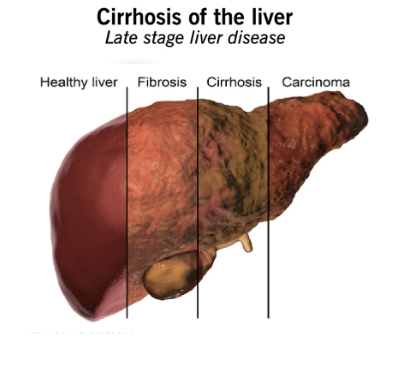



To achieve this, we employ machine learning algorithms and evaluate the performance of multiple classification models, including:

1- Feature importance using XGBoost

2- applied oversampling by SVMSMOTE

3- Logistic Regression

4- Support Vector Machine

5- XGBoost

6- AdaBoost

7- K-Nearest Neighbors

By leveraging these techniques, the project aims to enhance the understanding of cirrhosis prognosis and provide valuable insights to support clinical decision-makin
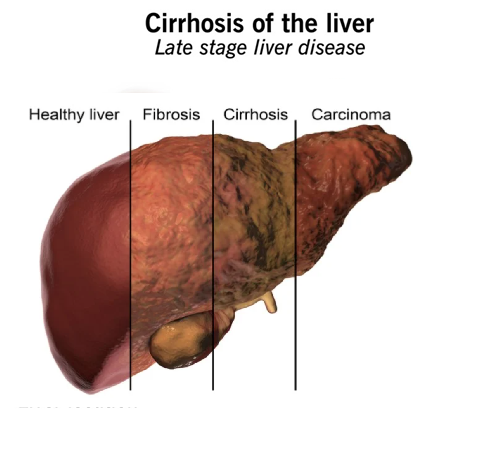

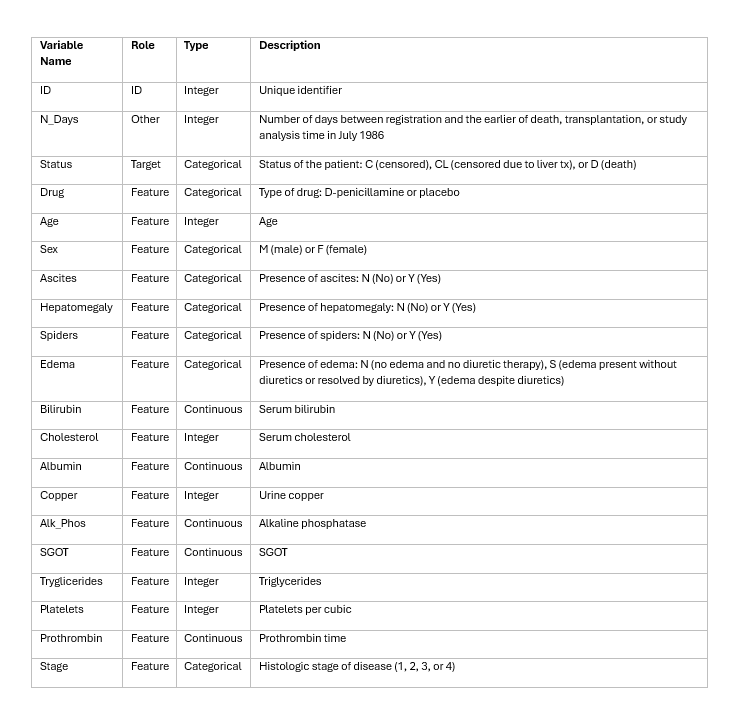

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             matthews_corrcoef, confusion_matrix, classification_report, 
                             roc_curve, roc_auc_score)

In [2]:
df=pd.read_csv("/kaggle/input/playground-series-s3e26/train.csv")
df

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D


In [3]:
df.drop(['N_Days'],axis=1,inplace=True)

In [4]:
#df.drop(['id'],axis=1,inplace=True)

In [5]:
# Count the missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 id               0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64


In [6]:
df

,id,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,7901,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,7902,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,7903,D-penicillamine,22960,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D


In [7]:
df['Status'].value_counts()

Status
C     4965
D     2665
CL     275
Name: count, dtype: int64

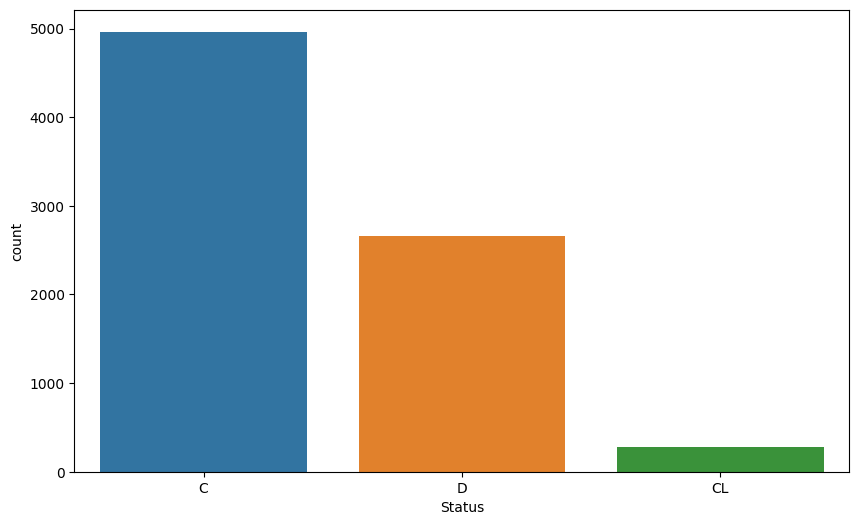

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='Status', data=df, order=df['Status'].value_counts().index);

In [9]:
columns=['Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema','Status']#
le=LabelEncoder()
for i in columns:
    df[i]=le.fit_transform(df[i])

df

,id,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,0,21532,1,0,0,0,0,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,2
1,1,1,19237,0,0,0,0,0,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,0
2,2,1,13727,0,0,1,1,2,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,2
3,3,1,18460,0,0,0,0,0,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,0
4,4,1,16658,0,0,1,0,0,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,0,16839,0,0,0,0,0,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,0
7901,7901,1,17031,0,0,1,0,0,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,0
7902,7902,0,25873,0,0,0,1,1,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,2
7903,7903,0,22960,1,0,1,0,0,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,2


In [10]:
x = df.drop('Status', axis=1)
y = df['Status']

In [11]:
from imblearn.over_sampling import SVMSMOTE
from collections import Counter
sm = SVMSMOTE(random_state=55)
xx, yy = sm.fit_resample(x,y)

Resampled dataset shape Counter({2: 4965, 0: 4965, 1: 4965})


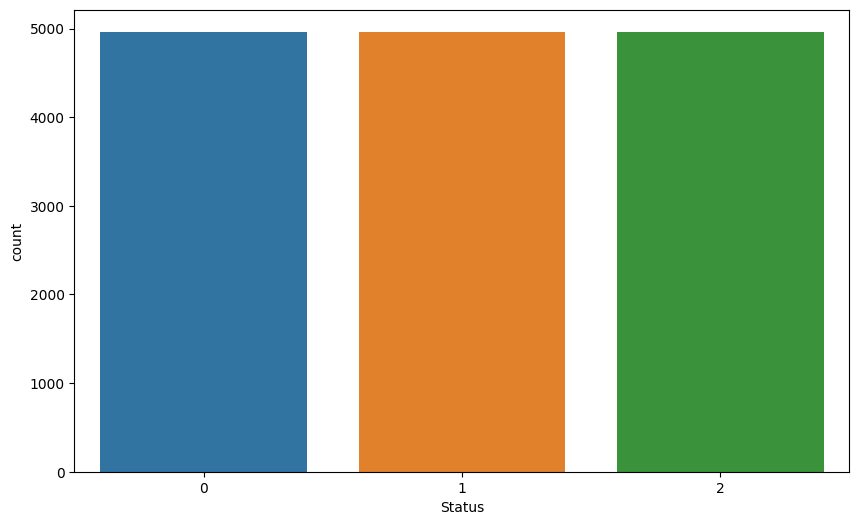

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x=yy,data=df)
print('Resampled dataset shape %s' % Counter(yy))

In [13]:
# split testing and training sets
X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.25, random_state=20) # 65/35

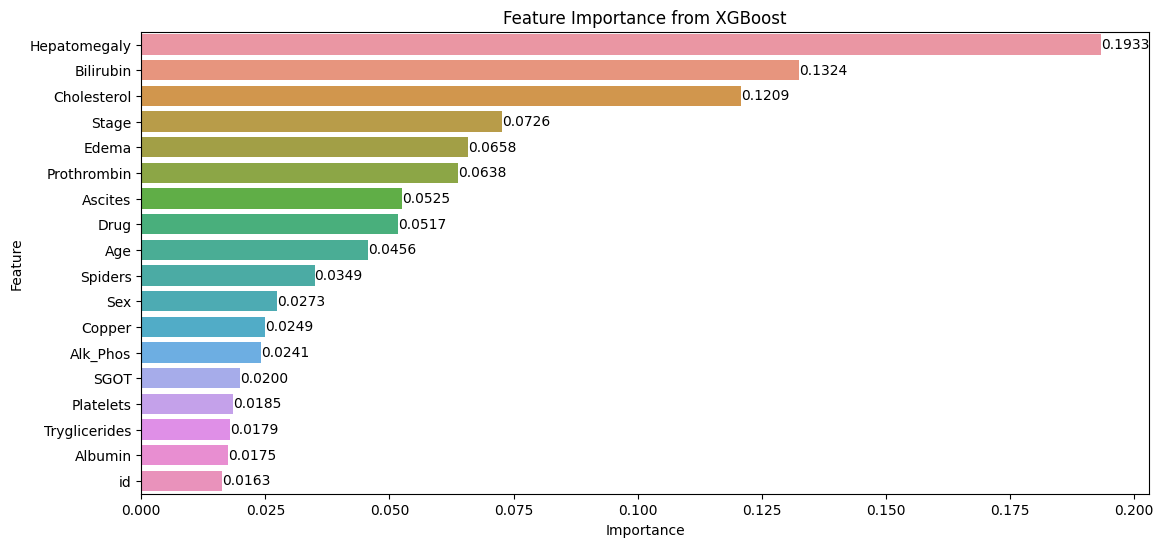

In [14]:
# Feature importance using XGBoost

rf = XGBClassifier(random_state=42)
rf.fit(X_train, y_train)  # Use X_train_strat and y_train_strat

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(13, 6))
ax = sns.barplot(x='Importance', y='Feature', data=importance_df)

# Annotate the bars with the numerical importance values
for index, value in enumerate(importance_df['Importance']):
    ax.text(value, index, f'{value:.4f}', va='center', ha='left')

plt.title('Feature Importance from XGBoost')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.7293
Testing Accuracy: 0.7170
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.78      0.72      1245
           1       0.80      0.72      0.76      1219
           2       0.69      0.65      0.67      1260

    accuracy                           0.72      3724
   macro avg       0.72      0.72      0.72      3724
weighted avg       0.72      0.72      0.72      3724

Accuracy: 0.7170
Precision: 0.7216
Recall: 0.7170
F1 Score: 0.7171
MCC: 0.5771
*******************************************


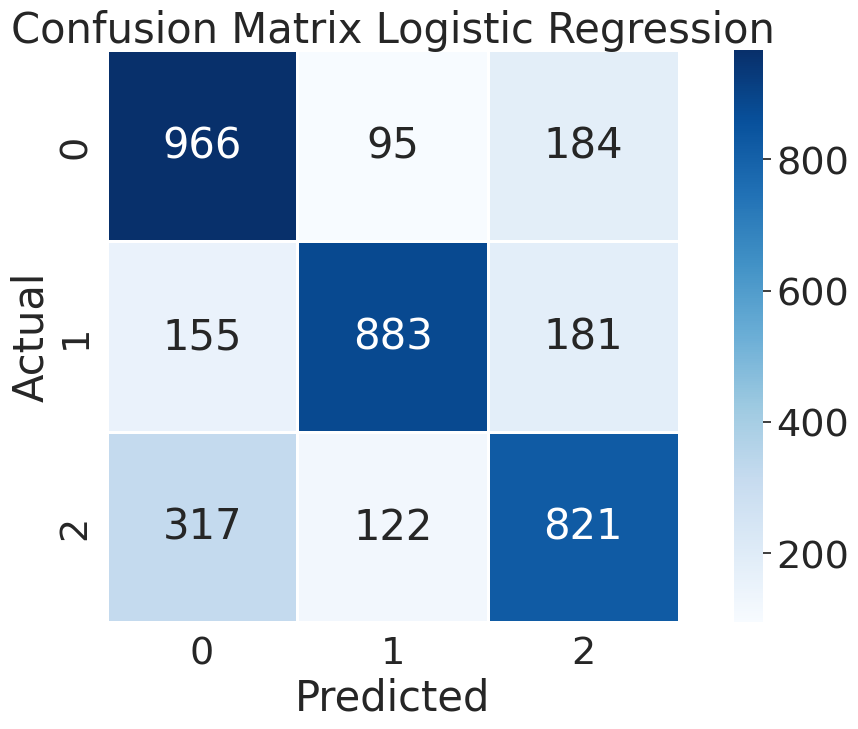

In [15]:
# Logistic Regression Classifier
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

# Make predictions
predictions_lr = model_lr.predict(X_test)

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, model_lr.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions_lr)

# Print accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Classification report
report = classification_report(y_test, predictions_lr)
print("Classification Report:\n", report)

# performance metrics
accuracy = accuracy_score(y_test, predictions_lr)
precision = precision_score(y_test, predictions_lr, average='weighted')
recall = recall_score(y_test, predictions_lr, average='weighted')
f1 = f1_score(y_test, predictions_lr, average='weighted')
mcc = matthews_corrcoef(y_test, predictions_lr)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'MCC: {mcc:.4f}')
print('*******************************************')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_lr)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.set(font_scale=2.5)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size':30}, fmt=".0f", square=True, cmap=plt.cm.Blues, linewidths=0.8)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Logistic Regression')
plt.tight_layout()
plt.show()

Training Accuracy: 0.6412
Testing Accuracy: 0.6359
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.74      0.59      1245
           1       0.95      0.61      0.74      1219
           2       0.67      0.55      0.61      1260

    accuracy                           0.64      3724
   macro avg       0.70      0.64      0.65      3724
weighted avg       0.70      0.64      0.65      3724

Accuracy: 0.6359
Precision: 0.7016
Recall: 0.6359
F1 Score: 0.6455
MCC: 0.4708
*******************************************


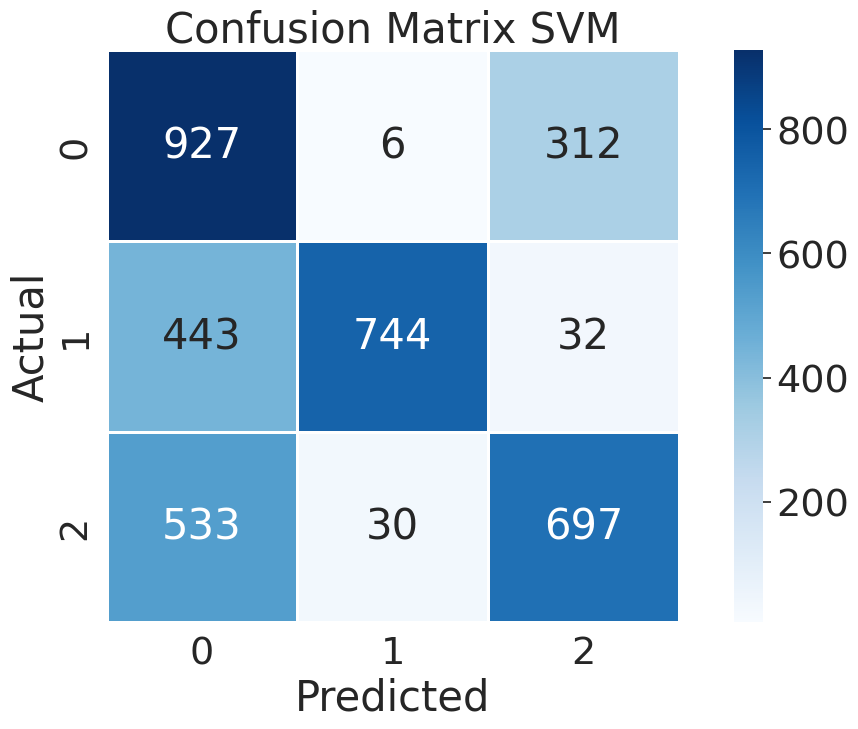

In [16]:
# SVM Classifier
model_svm = SVC(kernel='rbf', probability=True)  # Using RBF kernel
model_svm.fit(X_train, y_train)

# Make predictions
predictions_svm = model_svm.predict(X_test)

# training and testing sets
train_accuracy = accuracy_score(y_train, model_svm.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions_svm)

# Print accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

#classification report
report = classification_report(y_test, predictions_svm)
print("Classification Report:\n", report)

# performance metrics
accuracy = accuracy_score(y_test, predictions_svm)
precision = precision_score(y_test, predictions_svm, average='weighted')
recall = recall_score(y_test, predictions_svm, average='weighted')
f1 = f1_score(y_test, predictions_svm, average='weighted')
mcc = matthews_corrcoef(y_test, predictions_svm)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'MCC: {mcc:.4f}')
print('*******************************************')

# Confusion Matrix 
conf_matrix = confusion_matrix(y_test, predictions_svm)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.set(font_scale=2.5)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size':30}, fmt=".0f", square=True, cmap=plt.cm.Blues, linewidths=0.8)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix SVM')
plt.tight_layout()
plt.show()


Training Accuracy: 0.9936
Testing Accuracy: 0.8955
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1245
           1       0.97      0.95      0.96      1219
           2       0.88      0.85      0.86      1260

    accuracy                           0.90      3724
   macro avg       0.90      0.90      0.90      3724
weighted avg       0.90      0.90      0.90      3724

Accuracy: 0.8955
Precision: 0.8969
Recall: 0.8955
F1 Score: 0.8959
MCC: 0.8437
*******************************************


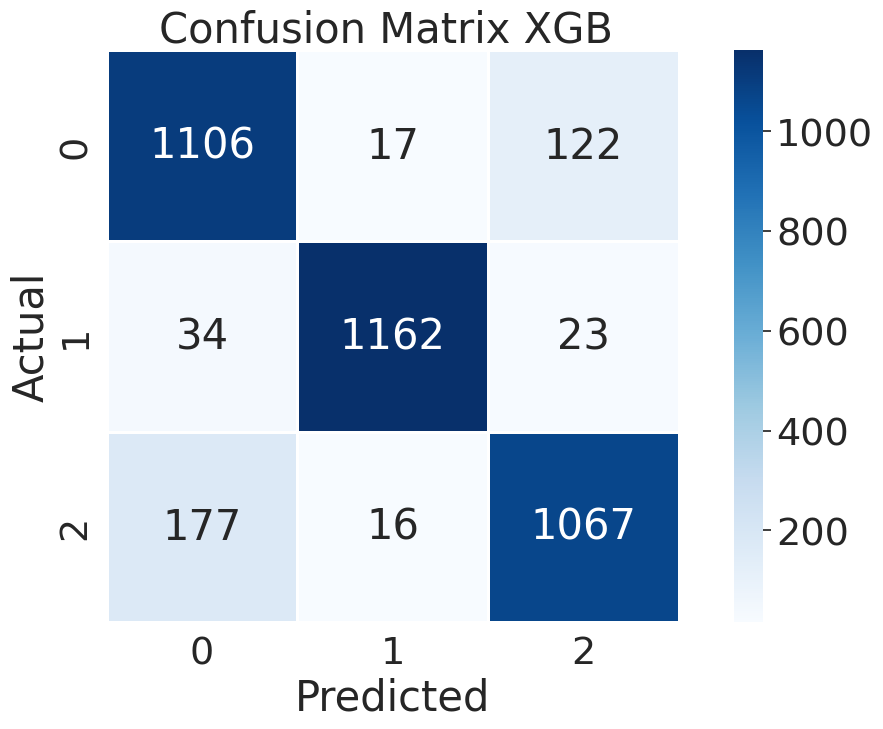

In [17]:
# XGBoost Classifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

# Make predictions
predictions_xgb = model_xgb.predict(X_test)

# training and testing sets
train_accuracy = accuracy_score(y_train, model_xgb.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions_xgb)

# Print accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Generate and print classification report
report = classification_report(y_test, predictions_xgb)
print("Classification Report:\n", report)

# performance metrics
accuracy = accuracy_score(y_test, predictions_xgb)
precision = precision_score(y_test, predictions_xgb, average='weighted')
recall = recall_score(y_test, predictions_xgb, average='weighted')
f1 = f1_score(y_test, predictions_xgb, average='weighted')
mcc = matthews_corrcoef(y_test, predictions_xgb)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'MCC: {mcc:.4f}')
print('*******************************************')

# Confusion Matrix 
conf_matrix = confusion_matrix(y_test, predictions_xgb)

# Plot confusion matrix
plt.figure(figsize=(12,8))
sns.set(font_scale= 2.5)
sns.heatmap(conf_matrix, annot = True, annot_kws={'size':30}
            ,fmt = ".0f", square = True, cmap = plt.cm.Blues,linewidths=0.8)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix XGB ')
plt.tight_layout()

Training Accuracy: 0.8254
Testing Accuracy: 0.8163
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80      1245
           1       0.89      0.86      0.88      1219
           2       0.79      0.75      0.77      1260

    accuracy                           0.82      3724
   macro avg       0.82      0.82      0.82      3724
weighted avg       0.82      0.82      0.82      3724

Accuracy: 0.8163
Precision: 0.8178
Recall: 0.8163
F1 Score: 0.8165
MCC: 0.7251
*******************************************


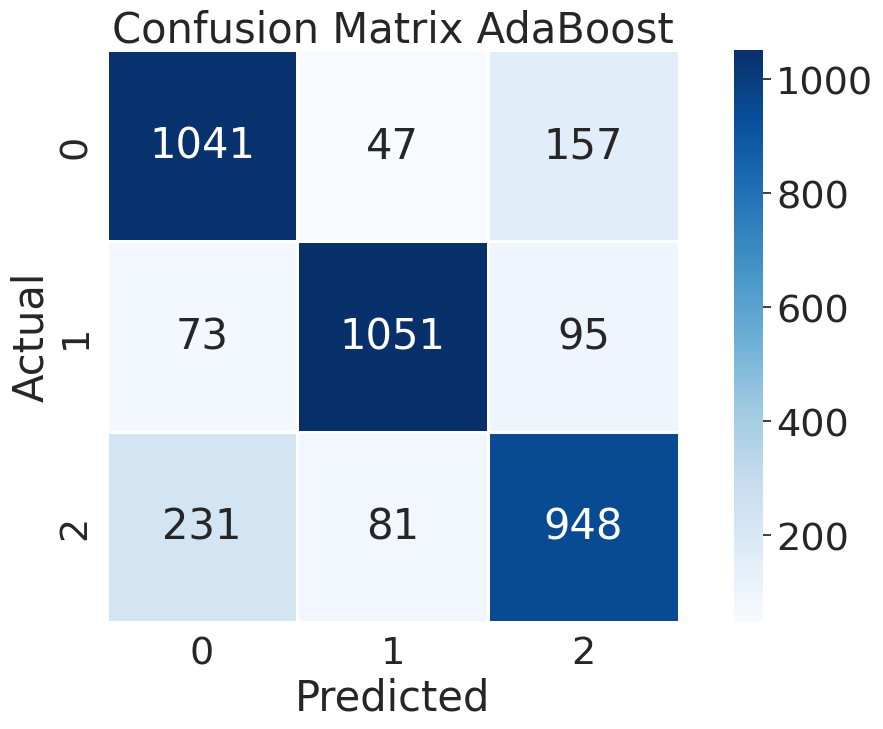

In [18]:
# AdaBoost Classifier
model_ada = AdaBoostClassifier(n_estimators=50)
model_ada.fit(X_train, y_train)

# Make predictions
predictions_ada = model_ada.predict(X_test)

# training and testing sets
train_accuracy = accuracy_score(y_train, model_ada.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions_ada)

# Print accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# classification report
report = classification_report(y_test, predictions_ada)
print("Classification Report:\n", report)

# Calculate and print various performance metrics
accuracy = accuracy_score(y_test, predictions_ada)
precision = precision_score(y_test, predictions_ada, average='weighted')
recall = recall_score(y_test, predictions_ada, average='weighted')
f1 = f1_score(y_test, predictions_ada, average='weighted')
mcc = matthews_corrcoef(y_test, predictions_ada)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'MCC: {mcc:.4f}')
print('*******************************************')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_ada)


# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.set(font_scale=2.5)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size':30}, fmt=".0f", square=True, cmap=plt.cm.Blues, linewidths=0.8)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix AdaBoost')
plt.tight_layout()
plt.show()

Training Accuracy: 0.8527
Testing Accuracy: 0.7750
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.66      0.68      1245
           1       0.89      0.96      0.92      1219
           2       0.73      0.71      0.72      1260

    accuracy                           0.77      3724
   macro avg       0.77      0.78      0.77      3724
weighted avg       0.77      0.77      0.77      3724

Accuracy: 0.7750
Precision: 0.7704
Recall: 0.7750
F1 Score: 0.7721
MCC: 0.6630
*******************************************


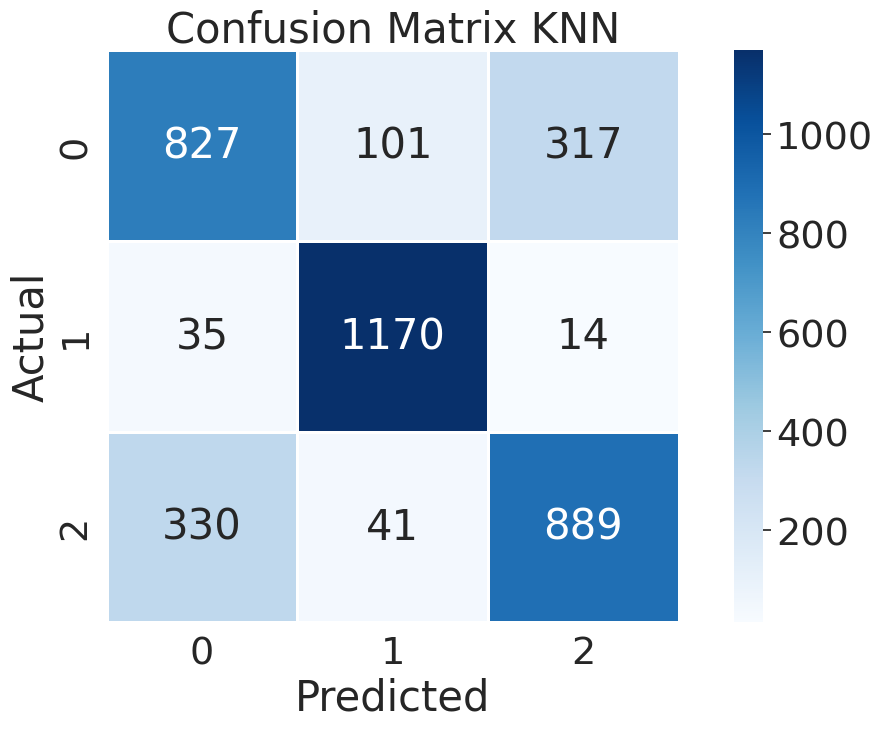

In [19]:
# K-Nearest Neighbors Classifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

# Make predictions
predictions_knn = model_knn.predict(X_test)

# accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, model_knn.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions_knn)

# Print accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Generate and print classification report
report = classification_report(y_test, predictions_knn)
print("Classification Report:\n", report)


# performance metrics
accuracy = accuracy_score(y_test, predictions_knn)
precision = precision_score(y_test, predictions_knn, average='weighted')
recall = recall_score(y_test, predictions_knn, average='weighted')
f1 = f1_score(y_test, predictions_knn, average='weighted')
mcc = matthews_corrcoef(y_test, predictions_knn)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'MCC: {mcc:.4f}')
print('*******************************************')

# Confusion Matrix 
conf_matrix = confusion_matrix(y_test, predictions_knn)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.set(font_scale=2.5)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size':30}, fmt=".0f", square=True, cmap=plt.cm.Blues, linewidths=0.8)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix KNN')
plt.tight_layout()
plt.show()

In [20]:
test=pd.read_csv("/kaggle/input/playground-series-s3e26/test.csv")
test

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,13171,2870,Placebo,12279,F,N,N,N,N,1.3,302.0,3.43,75.0,1345.0,145.00,44.0,181.0,10.6,3.0
5267,13172,1770,Placebo,24803,F,N,N,N,N,0.5,219.0,4.09,121.0,663.0,79.05,94.0,311.0,9.7,3.0
5268,13173,3707,D-penicillamine,16990,F,N,Y,N,N,0.8,315.0,4.09,13.0,1637.0,170.50,70.0,426.0,10.9,3.0
5269,13174,1216,Placebo,11773,F,N,N,N,N,0.7,329.0,3.80,52.0,678.0,57.00,126.0,306.0,10.2,1.0


In [21]:
test.drop(['N_Days'],axis=1,inplace=True)

In [22]:
 test

,id,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,13171,Placebo,12279,F,N,N,N,N,1.3,302.0,3.43,75.0,1345.0,145.00,44.0,181.0,10.6,3.0
5267,13172,Placebo,24803,F,N,N,N,N,0.5,219.0,4.09,121.0,663.0,79.05,94.0,311.0,9.7,3.0
5268,13173,D-penicillamine,16990,F,N,Y,N,N,0.8,315.0,4.09,13.0,1637.0,170.50,70.0,426.0,10.9,3.0
5269,13174,Placebo,11773,F,N,N,N,N,0.7,329.0,3.80,52.0,678.0,57.00,126.0,306.0,10.2,1.0


In [23]:
from sklearn.preprocessing import LabelEncoder

c = ['Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema']
#l_encoders = {}  # Dictionary to store encoders for each column

le=LabelEncoder()
for i in c:
    test[i]=le.fit_transform(test[i])

In [24]:
test


,id,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,0,19724,0,0,1,0,0,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,0,14975,0,0,0,0,0,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,1,13149,0,0,1,0,2,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,0,20510,0,0,0,0,0,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,0,21904,0,0,1,0,0,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,13171,1,12279,0,0,0,0,0,1.3,302.0,3.43,75.0,1345.0,145.00,44.0,181.0,10.6,3.0
5267,13172,1,24803,0,0,0,0,0,0.5,219.0,4.09,121.0,663.0,79.05,94.0,311.0,9.7,3.0
5268,13173,0,16990,0,0,1,0,0,0.8,315.0,4.09,13.0,1637.0,170.50,70.0,426.0,10.9,3.0
5269,13174,1,11773,0,0,0,0,0,0.7,329.0,3.80,52.0,678.0,57.00,126.0,306.0,10.2,1.0


In [25]:
# Make predictions
predictions_xgb = model_xgb.predict(X_test)

# training and testing sets
train_accuracy = accuracy_score(y_train, model_xgb.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions_xgb)

In [26]:
prob = model_xgb.predict_proba(test)  
prob

array([[3.1008732e-01, 4.3217288e-03, 6.8559092e-01],
       [3.3878177e-01, 1.4314175e-01, 5.1807648e-01],
       [2.5265349e-02, 1.4805289e-04, 9.7458661e-01],
       ...,
       [9.6103549e-01, 2.1463118e-03, 3.6818154e-02],
       [9.9960119e-01, 5.7441302e-05, 3.4135938e-04],
       [3.2508180e-02, 8.9108806e-05, 9.6740270e-01]], dtype=float32)

In [27]:
submission = pd.DataFrame(prob, columns=['Status_C', 'Status_D', 'Status_CL'])
submission['id'] = test['id']
submission = submission[['id', 'Status_C', 'Status_D', 'Status_CL']]
submission.to_csv('submission.csv', index=False)
submission

,id,Status_C,Status_D,Status_CL
0,7905,0.310087,0.004322,0.685591
1,7906,0.338782,0.143142,0.518076
2,7907,0.025265,0.000148,0.974587
3,7908,0.994415,0.000202,0.005383
4,7909,0.674129,0.012320,0.313551
...,...,...,...,...
5266,13171,0.883026,0.097565,0.019409
5267,13172,0.997939,0.000363,0.001698
5268,13173,0.961035,0.002146,0.036818
5269,13174,0.999601,0.000057,0.000341
